# 1. Comprensión del negocio

# ¿Cuál es el problema que se quiere resolver con los datos?

Se desea predecir si una persona comprará una bicicleta basándose en características demográficas y socioeconómicas como edad, ingreso, nivel educativo, distancia al trabajo, etc.

# ¿Por qué es importante resolver este problema para la organización o el contexto?
Identificar correctamente a los potenciales compradores permite a la empresa:

Optimizar estrategias de marketing.

Focalizar campañas hacia los perfiles más propensos a comprar.

Aumentar las ventas de bicicletas.

Reducir costos de publicidad dirigida a clientes con baja probabilidad de compra.


# ¿Qué valor o impacto se espera obtener al resolver este problema con minería de datos?

Segmentación precisa de clientes.

Mejor toma de decisiones comerciales basadas en datos reales.

Aumento en el retorno de inversión (ROI) en campañas de marketing.

Posibilidad de aplicar el modelo predictivo a futuros prospectos y automatizar el proceso de decisión.



# 2. Comprensión de los datos

In [38]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('bike_buyers.csv')

Se importan las librerias
y se carga el data set

In [39]:
# Vista general
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


Se visualiza el data set

In [40]:
# Info general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


Se visualiza los tipos de datos

In [41]:
# Distribución de la variable objetivo
df['Purchased Bike'].value_counts()


,count
Purchased Bike,
No,519
Yes,481


In [42]:
# Revisión de valores nulos
df.isnull().sum()

,0
ID,0
Marital Status,7
Gender,11
Income,6
Children,8
Education,0
Occupation,0
Home Owner,4
Cars,9
Commute Distance,0


In [43]:
# Tratamiento de valores nulos

# Categóricas: reemplazo con la moda
cat_cols = ['Marital Status', 'Gender', 'Home Owner']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numéricas: reemplazo con la mediana
num_cols = ['Income', 'Children', 'Cars', 'Age']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-43-3146822228.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-43-3146822228.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

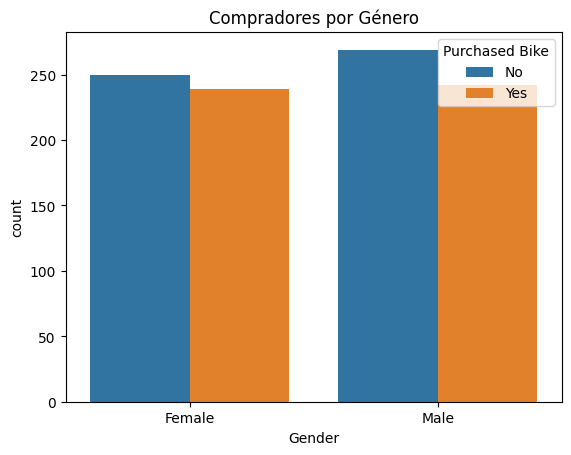

In [44]:
# Ejemplo: compradores por género
sns.countplot(data=df, x='Gender', hue='Purchased Bike')
plt.title("Compradores por Género")
plt.show()


# 3. Preparación de los datos

In [45]:
# Eliminar columna ID
df = df.drop('ID', axis=1)

# Codificación de variables categóricas
label_cols = ['Marital Status', 'Gender', 'Education', 'Occupation',
              'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separar variables predictoras y objetivo
X = df.drop('Purchased Bike', axis=1)
y = df['Purchased Bike']

# División de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Modelado

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un solo modelo (ej. Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)


# 5. Evaluación

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       148
           1       0.75      0.70      0.73       152

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300

[[113  35]
 [ 45 107]]
K-Fold Accuracy: [0.685 0.67  0.74  0.715 0.72 ]
Mean Accuracy: 0.7059999999999998


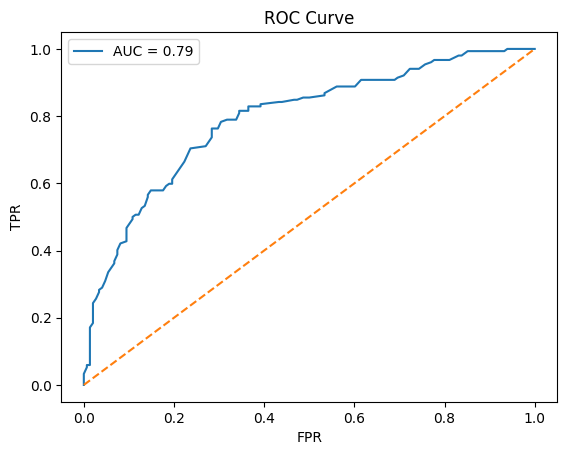

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Reporte de métricas
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("K-Fold Accuracy:", scores)
print("Mean Accuracy:", scores.mean())

# ROC y AUC
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

6. Preguntas de análisis

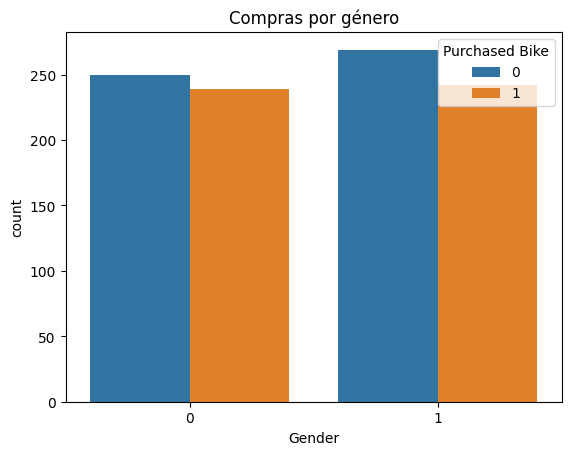

In [48]:
# ¿Los hombres compran más bicicletas que las mujeres?
sns.countplot(data=df, x='Gender', hue='Purchased Bike')
plt.title("Compras por género")
plt.show()

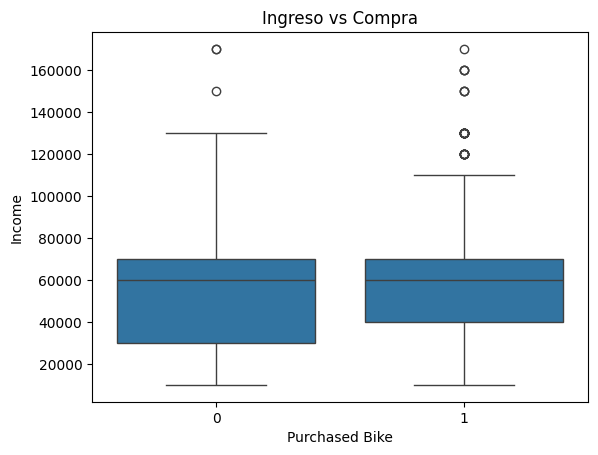

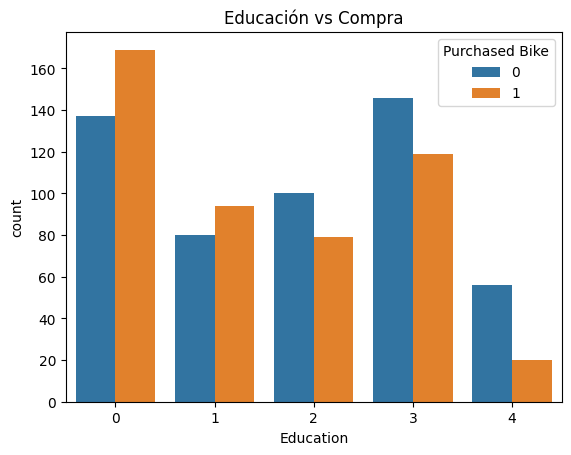

In [49]:
# ¿Influye el ingreso o el nivel educativo en la compra de bicicletas?
sns.boxplot(x='Purchased Bike', y='Income', data=df)
plt.title("Ingreso vs Compra")
plt.show()

sns.countplot(data=df, x='Education', hue='Purchased Bike')
plt.title("Educación vs Compra")
plt.show()

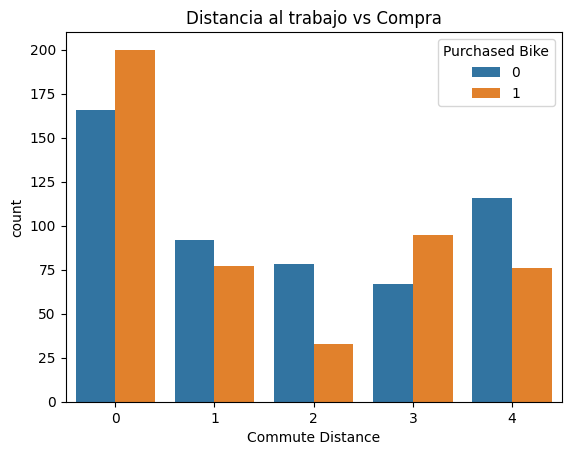

In [50]:
# ¿La distancia de casa al trabajo cambia la probabilidad de comprar una bicicleta?
sns.countplot(data=df, x='Commute Distance', hue='Purchased Bike')
plt.title("Distancia al trabajo vs Compra")
plt.show()

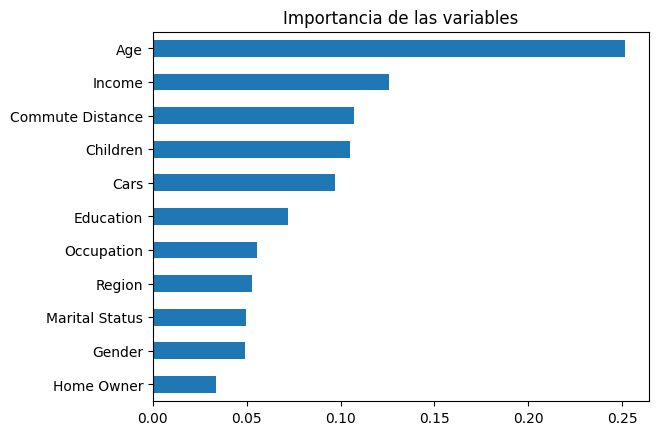

In [51]:
# ¿Qué perfil de cliente debería atacar el equipo de marketing?
# Analizar importancia de variables
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Importancia de las variables")
plt.show()